In [30]:
import numpy as np
import pandas as pd

In [31]:
df=pd.read_csv('D:/DEPI/Amit/Amit/data_analysis/In-Sessions/data_sets/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)


In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [34]:
dtypes=df.dtypes
n_unique=df.nunique()
pd.DataFrame({"Dtype":dtypes,"num_unigue":n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unigue,2,3,2,88,7,7,248,147,3


In [35]:
def chk_type(df):
   dtypes=df.dtypes
   n_unique=df.nunique()
   return pd.DataFrame({"Dtype":dtypes,"num_unigue":n_unique}).T

chk_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unigue,2,3,2,88,7,7,248,147,3


In [36]:
from chk_t import chk_type
chk_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unigue,2,3,2,88,7,7,248,147,3


In [37]:
cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
df[cols] =df[cols].astype('category')


In [38]:
from chk_t import chk_type
chk_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,str,category
num_unigue,2,3,2,88,7,7,248,147,3


In [39]:
def handle_types(cols):
   df[cols] = df[cols].astype('category')
   chk_type(df)

In [40]:

null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null":null,"Ratio":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


In [41]:
df = df.dropna(subset=['Embarked'])

In [42]:
df = df.drop('Cabin',axis=1)

In [43]:
median = df['Age'].median()
df['Age']=df['Age'].fillna(median)

In [44]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null":null,"Ratio":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
!pip install matplotlib seaborn



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
num_col=['Age','Fare']


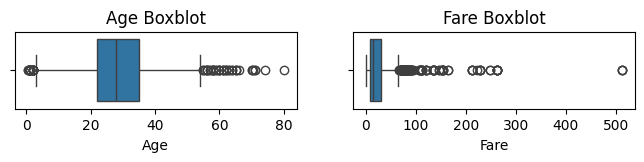

In [48]:
num_cols=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
   plt.subplot(1,2,i+1)
   sns.boxplot(x=df[col],orient="h")
   plt.title(f"{col} Boxblot")

In [49]:
# def outliers_change(num_cols):
for col in num_cols:
      Q1= df[col].quantile(0.25)
      #print(Q1)
      Q3=df[col].quantile(0.75)
      # print(Q3)
      IQR=Q3-Q1
      # print(IQR)
      Lower_Fence=Q1-1.5*IQR
      Upper_Fance=Q3+1.5*IQR
      # print(Lower_Fence)
      # print(Upper_Fance)
      Lower_Outliers = df[df[col]<Lower_Fence][col].values
      # print(Lower_Outliers)
      Upper_Outliers = df[df[col]>Upper_Fance][col].values
      # print(Upper_Outliers)
      
      df[col].replace(Lower_Outliers,Lower_Fence,inplace=True)
      df[col].replace(Upper_Outliers,Upper_Fance,inplace=True)
# outliers_change(num_cols)

C:\Users\hp\AppData\Local\Temp\ipykernel_20592\2806790628.py:18: ChainedAssignmentError:

A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html

C:\Users\hp\AppData\Local\Temp\ipykernel_20592\2806790628.py:19: ChainedAssignmentError:

A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never 

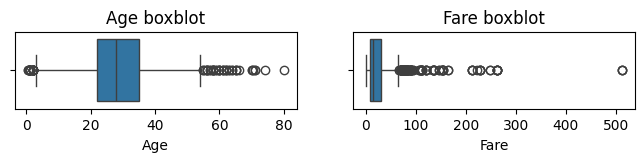

In [50]:
num_col=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_col):
   plt.subplot(1,2,i+1)
   sns.boxplot(x=df[col])
   plt.title(f"{col} boxblot")
   # plt.show()

In [51]:
df.duplicated().sum()

np.int64(116)

In [52]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

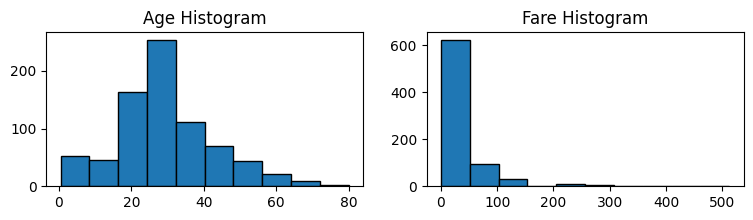

In [53]:
num_col=df.select_dtypes('number').columns
plt.figure(figsize=(9,2))
for i,col in enumerate(num_col):
   plt.subplot(1,2,i+1)
   plt.hist(df[col],edgecolor='black')
   plt.title(f"{col} Histogram")
plt.show()

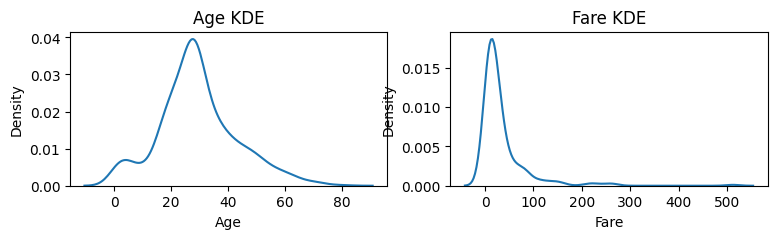

In [54]:
num_col=df.select_dtypes('number').columns
plt.figure(figsize=(9,2))
for i,col in enumerate(num_col):
   plt.subplot(1,2,i+1)
   sns.kdeplot(df[col])
   plt.title(f"{col} KDE")
plt.show()

In [55]:
num_col=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_col):
   plt.subplot(1,2,i+1)
   sns.(x=df[col])
   plt.title(f"{col} boxblot")
   plt.show()

SyntaxError: invalid syntax (114754627.py, line 5)

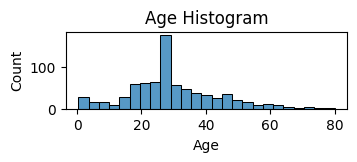

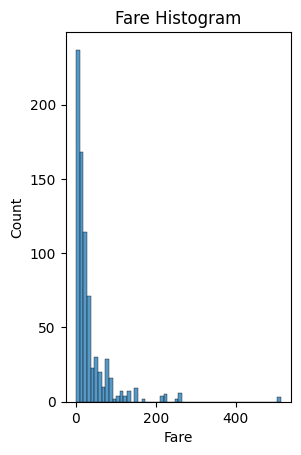

In [ ]:
num_col=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_col):
   plt.subplot(1,2,i+1)
   sns.histplot(x=df[col])
   plt.title(f"{col} Histogram")
   plt.show()

In [56]:
cat_cols =df.select_dtypes('category').columns

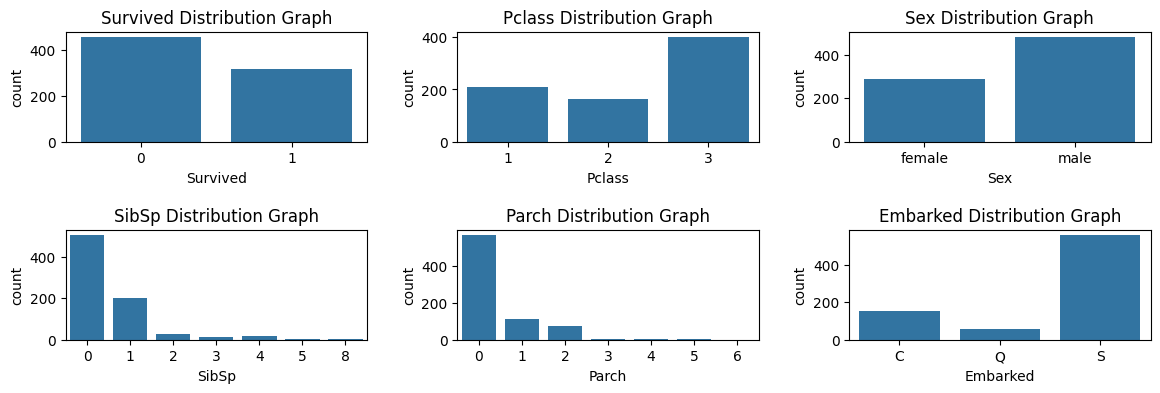

In [57]:
cat_cols = df.select_dtypes('category').columns
plt.figure(figsize=(14,4))
for i,col in enumerate(cat_cols):
   plt.subplot(2,3,i+1)
   sns.countplot(x=col,data=df)
   plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8,wspace=.3)
plt.show()

In [58]:
unique = df['Survived'].value_counts()
count = unique.values
categories = unique.index

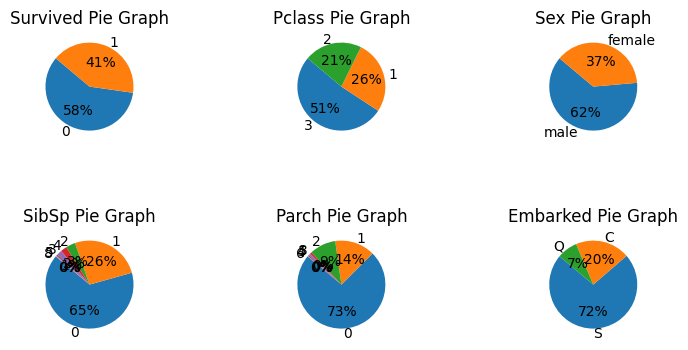

In [59]:
plt.figure(figsize=(9,4))
for i ,col in enumerate(cat_cols):
   plt.subplot(2,3 ,i+1)
   unique = df[col].value_counts()
   count = unique.values
   categories = unique.index
   plt.pie(count,labels=categories,startangle=140,autopct='%1.1d%%')
   plt.title(f"{col} Pie Graph")
plt.subplots_adjust(hspace=.8,wspace=.3)
plt.show()   

In [60]:
df.shape

(773, 8)

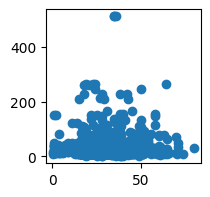

In [61]:
plt.figure(figsize=(2,2))
plt.scatter(df['Age'],df['Fare'])

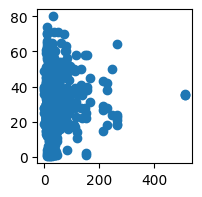

In [62]:
plt.figure(figsize=(2,2))
plt.scatter(df['Fare'],df['Age'])

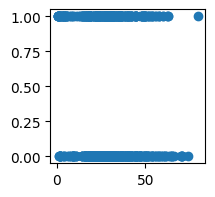

In [63]:
plt.figure(figsize=(2,2))
plt.scatter(df['Age'],df['Survived'])

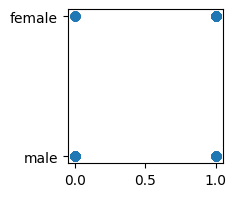

In [64]:
plt.figure(figsize=(2,2))
plt.scatter(df['Survived'],df['Sex'])

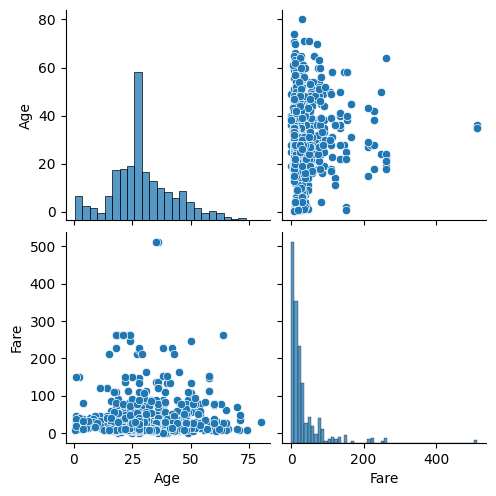

In [65]:
sns.pairplot(df)

In [66]:
corr = df[['Age','Fare']].corr()
corr

,Age,Fare
Age,1.000000,0.089624
Fare,0.089624,1.000000


In [67]:
df.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

In [68]:
corr = df.select_dtypes(include='number').corr()
corr

,Age,Fare
Age,1.000000,0.089624
Fare,0.089624,1.000000


In [69]:
agg = df.pivot_table(index='Survived',columns='Sex',values='Age',aggfunc=len)
agg

Sex,female,male
Survived,,
0,76,379
1,214,104


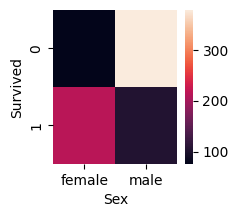

In [70]:
plt.figure(figsize=(2,2))
sns.heatmap(agg)
plt.show()

In [71]:
x = df.drop('Survived',axis=1)
y = df['Survived']


In [72]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [73]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 773, dtype: category
Categories (2, int64): [0, 1]

In [74]:
df.iloc[:,-1:]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
885,Q
887,S
888,S
889,C


In [75]:
from sklearn.preprocessing import MinMaxScaler
num_cols = x.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

In [76]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.271174,1,0,0.014151,S
1,1,female,0.472229,1,0,0.139136,C
2,3,female,0.321438,0,0,0.015469,S
3,1,female,0.434531,1,0,0.103644,S
4,3,male,0.434531,0,0,0.015713,S
...,...,...,...,...,...,...,...
885,3,female,0.484795,0,5,0.056848,Q
887,1,female,0.233476,0,0,0.058556,S
888,3,female,0.346569,1,2,0.045771,S
889,1,male,0.321438,0,0,0.058556,C


In [77]:
!pip install category-encoders



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
str_cols = ['Sex','Embarked']

In [79]:
str_cols = ['Sex','Embarked']
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols,drop_invariant=True)
x = encoder.fit_transform(x)

In [80]:
x

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.271174,1,0,0.014151,1,0,0
1,1,0,1,0.472229,1,0,0.139136,0,1,0
2,3,0,1,0.321438,0,0,0.015469,1,0,0
3,1,0,1,0.434531,1,0,0.103644,1,0,0
4,3,1,0,0.434531,0,0,0.015713,1,0,0
...,...,...,...,...,...,...,...,...,...,...
885,3,0,1,0.484795,0,5,0.056848,0,0,1
887,1,0,1,0.233476,0,0,0.058556,1,0,0
888,3,0,1,0.346569,1,2,0.045771,1,0,0
889,1,1,0,0.321438,0,0,0.058556,0,1,0


In [ ]:
!pip install plotly



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import plotly.express as px
import plotly.graph_objects as go

([<matplotlib.patches.Wedge at 0x12cea710a40>,
 [Text(-0.3022938072098454, 1.0576476039412073, '0'),
  Text(0.3022937735909196, -1.0576476135500719, '1')])

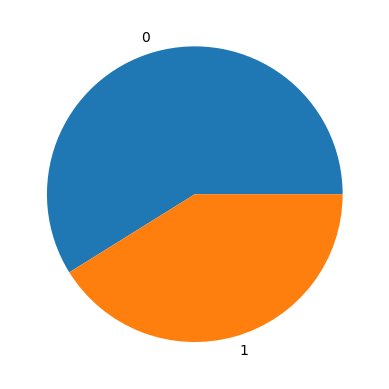

In [82]:
counts=df['Survived'].value_counts()
plt.pie(counts.values,
        labels=counts.index,
        )

In [ ]:
fig = px.pie(df, names='Survived',
       title='<b>Survived distribution </b>',
       color_discrete_map={0:'blue',
                           1:'red'},
       category_orders={'Survived':['1','0']},
       hole = 0.7
       )
fig.show()

In [91]:
fig = px.pie(df, names='Survived',
       title='<b>Survived distribution </b>',
       color_discrete_sequence=px.colors.qualitative.Pastel,
       hole = 0.4
       )
fig.show()

In [94]:
fig = px.pie(df, names='Survived',
       title='<b>Survived distribution </b>',
       color_discrete_sequence=px.colors.qualitative.Pastel,
       hole = 0.4
       )
fig.update_layout(annotations=[dict(text='Survived',font_size=20,x=0.5,y=0.5,showarrow=False)])
fig.show()

In [98]:
fig=px.histogram(df,x='Survived',
             color='Sex',title='<b>Survived based on Gender</b>',
             barmode='group'
             )
fig.update_layout(width=700,height=400,bargap=0.2)

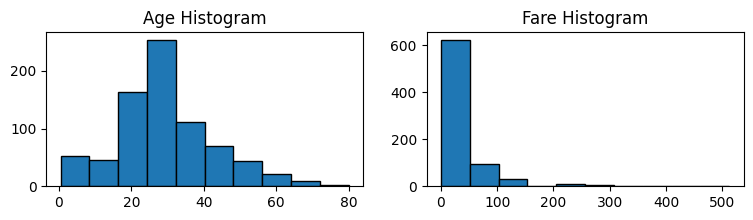

In [99]:
num_col=df.select_dtypes('number').columns
plt.figure(figsize=(9,2))
for i,col in enumerate(num_col):
   plt.subplot(1,2,i+1)
   plt.hist(df[col],edgecolor='black')
   plt.title(f"{col} Histogram")
plt.show()

In [107]:
import plotly.subplots as sp
import plotly.graph_objects as go

fig= sp.make_subplots(rows=1,cols=len(num_cols),subplot_titles=num_cols)
for i,col in enumerate(num_cols):
   fig.add_trace(go.Histogram(x=df[col],name=col,marker=dict(line=dict(color='black',width=1))),
                 row=1,col=i+1
                 )

fig.show()

In [108]:
!pip install dash

  Using cached dash-4.0.0-py3-none-any.whl.metadata (11 kB)
  Using cached flask-3.1.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached werkzeug-3.1.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached importlib_metadata-8.7.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached retrying-1.4.2-py3-none-any.whl.metadata (5.5 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached zipp-3.23.0-py3-none-any.whl.metadata (3.6 kB)
Using cached dash-4.0.0-py3-none-any.whl (7.2 MB)
Using cached flask-3.1.2-py3-none-any.whl (103 kB)
Using cached werkzeug-3.1.5-py3-none-any.whl (225 kB)
Using cached importlib_metadata-8.7.1-py3-none-any.whl (27 kB)
Using cached retrying-1.4.2-py3-none-any.whl (10 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached click-8.3.1-py3-none-any.whl (108 kB)
Using cached itsdangerous-2.2.0-py3-none-


[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

df=pd.read_excel('D:/DEPI/Amit/Amit/data_analysis/In-Sessions/data_sets/Dash.xlsx')
app=Dash()
num_cols=df.select_dtypes(include='number').columns

options = [{'label':col,'value':col}for col in num_cols],
                     value= num_cols[0]

In [ ]:
def update_pie(select_col):
   grouped=df.groupby('Area')[select_col].sum().reset_index()
   fig=px.pie(grouped,names='Area',values=select_col,title=f"distribution of {select_col}br Area",hole=0.4,
              color_discrete_sequence=px.colors.qualitative.Set2)
   return fig